# Digit-Recognition with Artificial Neural Networks using `Tensorflow`

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [ ]:
### some coding to undrestand better our dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


* see first item of X_train and y_train *

In [4]:
X_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

#### shape of our X_train, X_test, y_train, y_test

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### our labels are from 0 to 9

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### show image

Text(0.5, 1.0, 'first picture')

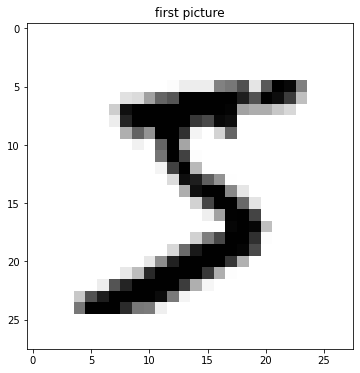

In [7]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.title('first picture')

### randomly show 4 images with labels

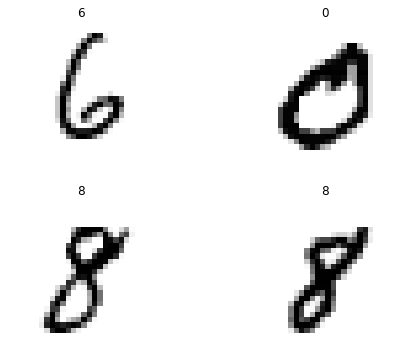

In [8]:
import random 
fig = plt.figure(figsize=(8, 6))
for i in range(0, 4):
    ax = plt.subplot(2, 2, i+1)
    random_num = random.randint(0, 100)
    plt.imshow(X_train[random_num], cmap=plt.cm.binary)
    plt.title(y_train[random_num])
    plt.axis(False)

# normalizing data!

### we are choosing the simplest way, just divide them to 255(every picture pixel value differs from 0 to 255, so we just divide them to the max values and it is going in 0-1 range(same as MinMaxScaler))

In [9]:
X_train, X_test = X_train / 255, X_test / 255

***correctly in 0-1!***

In [10]:
X_train.max(), X_test.min()

(1.0, 0.0)

# building our model

In [11]:
tf.random.set_seed(42)
# initial model
model = tf.keras.Sequential()
# creat a flatten layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# adding layers, first layer 8 units, second one 4 units and relu activation function
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
# output layer, with shape of 10(output shape) and softmax activation function
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile the model, with Adam optimizer, SparaseCategoricalCrossentrpy(because labels aren't in one-hot encoding)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# fit the model, with 20 epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

2022-03-04 16:15:58.703658: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 16:15:58.805722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 16:15:58.806479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-04 16:15:58.807742: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8695 - accuracy: 0.7159 - val_loss: 0.6042 - val_accuracy: 0.8180
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5508 - accuracy: 0.8389 - val_loss: 0.5158 - val_accuracy: 0.8572
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4725 - accuracy: 0.8659 - val_loss: 0.4455 - val_accuracy: 0.8769
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4261 - accuracy: 0.8800 - val_loss: 0.4213 - val_accuracy: 0.8849
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8888 - val_loss: 0.4078 - val_accuracy: 0.8879
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3704 - accuracy: 0.8950 - val_loss: 0.3810 - val_accuracy: 0.8926
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3531 - accuracy: 0.8989 - val_loss: 0.3796 - val_accuracy:

### 91% accuracy

#### summary of the model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 6,366
Trainable params: 6,366
Non-trainable params: 0
_________________________________________________________________


#### plot our model

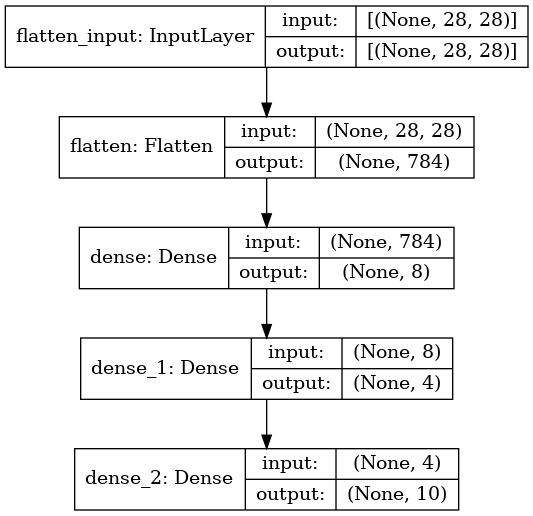

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# better understanding the training phase, plotting loss, accuracy

In [14]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe

,loss,accuracy,val_loss,val_accuracy
0,0.869517,0.715933,0.604176,0.8180
1,0.550759,0.838883,0.515783,0.8572
2,0.472526,0.865950,0.445456,0.8769
3,0.426134,0.880017,0.421271,0.8849
4,0.393972,0.888850,0.407787,0.8879
5,0.370354,0.895017,0.380963,0.8926
6,0.353143,0.898867,0.379617,0.8933
7,0.340078,0.902933,0.361882,0.8978
8,0.329108,0.905583,0.349133,0.9027
9,0.321651,0.907567,0.340573,0.9067


<AxesSubplot:>

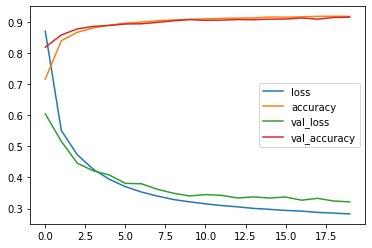

In [15]:
history_dataframe.plot()

Text(0, 0.5, 'test loss')

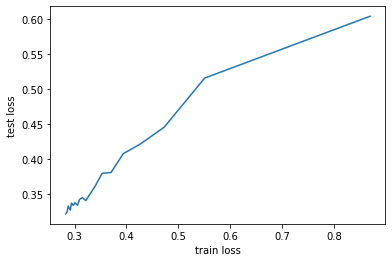

In [16]:
plt.plot(history.history['loss'], history.history['val_loss'])
plt.xlabel('train loss')
plt.ylabel('test loss')

# Starting Evaluating phase

In [17]:
y_preds = model.predict(X_test)

In [18]:
y_preds.shape

(10000, 10)

In [19]:
y_preds[:3]

array([[7.9214762e-22, 1.2754983e-11, 1.2972031e-05, 1.2940611e-03,
        1.0186928e-10, 2.9141118e-09, 7.8515760e-18, 9.9868971e-01,
        1.2452443e-06, 1.9552253e-06],
       [8.7499057e-11, 2.3538940e-05, 9.5166218e-01, 2.2080673e-03,
        2.5367222e-10, 3.5542589e-02, 7.7590063e-05, 6.8387121e-16,
        1.0486174e-02, 1.8053726e-15],
       [3.0599586e-03, 9.8221141e-01, 1.0961028e-03, 1.2115546e-03,
        1.4285912e-03, 4.3025375e-03, 1.8377400e-03, 1.0030348e-03,
        1.6091942e-03, 2.2396916e-03]], dtype=float32)

In [20]:
y_preds_labels = [tf.argmax(y_preds[i]) for i in range(len(y_preds))]

In [21]:
y_preds_labels[:5]

[<tf.Tensor: shape=(), dtype=int64, numpy=7>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>]

## Evaluating The Model

### make confusion matrix code directly copied from github

In [22]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


# confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds_labels)

array([[ 927,    3,    2,    0,    1,    8,   12,    1,   19,    7],
       [   1, 1108,    3,    5,    1,    7,    1,    0,    9,    0],
       [   1,    8,  939,   28,    7,    7,    8,   14,   20,    0],
       [   0,    5,   32,  897,    0,   49,    1,   16,   10,    0],
       [   2,    2,    3,    0,  900,    0,   10,    1,   24,   40],
       [   6,   23,    5,   46,    1,  728,    6,    2,   67,    8],
       [  21,   12,    3,    0,   12,    3,  893,    0,   14,    0],
       [   1,   10,   11,   12,    3,    0,    0,  968,    0,   23],
       [   6,   10,   11,   12,    8,   27,    4,   12,  870,   14],
       [   4,    8,    0,    4,   39,    7,    1,   24,    8,  914]])

### classification report contains:
* precision
* recall
* f1-score
* accuracy

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds_labels))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       980
           1       0.93      0.98      0.95      1135
           2       0.93      0.91      0.92      1032
           3       0.89      0.89      0.89      1010
           4       0.93      0.92      0.92       982
           5       0.87      0.82      0.84       892
           6       0.95      0.93      0.94       958
           7       0.93      0.94      0.94      1028
           8       0.84      0.89      0.86       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



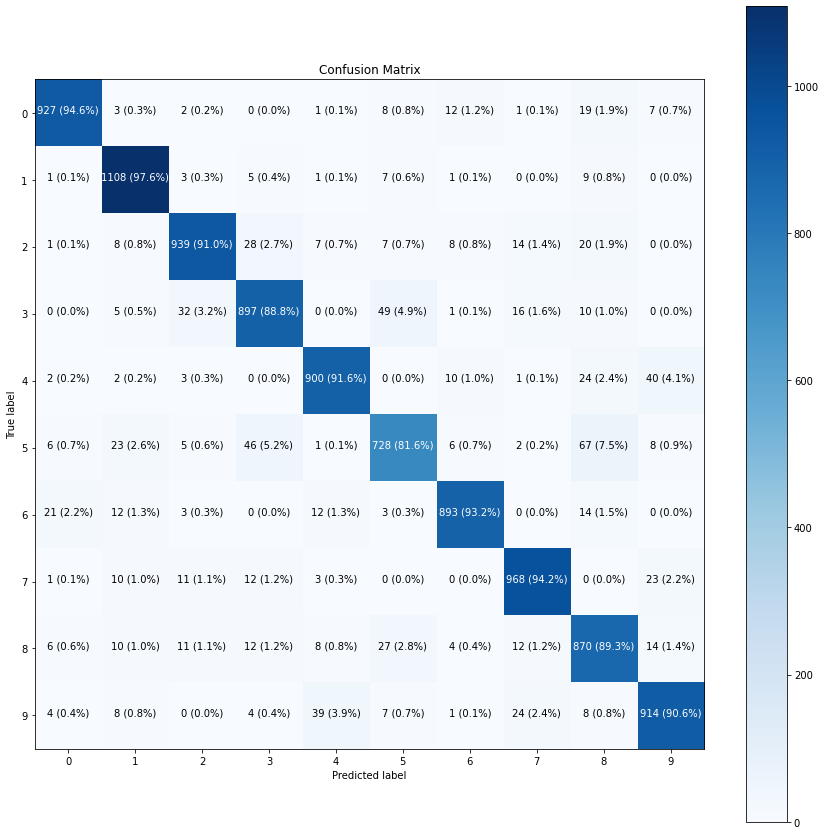

In [25]:
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds_labels,
                      figsize=(15, 15),
                      text_size=10)

# showing some images, with labels and prediction
### if prediction is correct, it shows it in green, and if it's wrong, it shows it in red

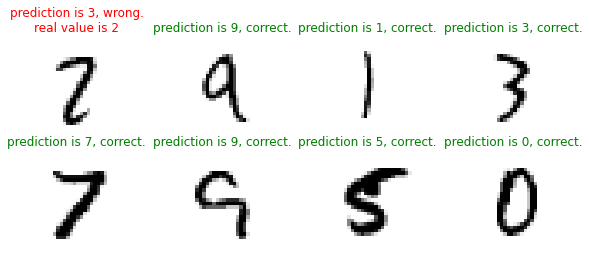

In [30]:
plt.figure(figsize=(10, 8))
for i in range(0, 8):
    plt.subplot(4, 4, i+1)
    random_2 = random.randint(0, 400)
    plt.imshow(X_test[random_2], cmap=plt.cm.binary)
    plt.axis(False)
    if (y_preds_labels[random_2] == y_test[random_2]):
        plt.title('prediction is {}, correct.'.format(y_preds_labels[random_2]), color='green')
    else:
        plt.title('prediction is {}, wrong.\nreal value is {}'.format(y_preds_labels[random_2], y_test[random_2]), color='red')

## one wrong, 7 correct, really good performance!